In [950]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.pipeline import make_pipeline

In [951]:
PATH = "./car_data.csv"
DATASET_SIZE = 10000

dataset = pd.read_csv(PATH)
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [952]:
le=LabelEncoder()

dataset["Fuel_Type"] = le.fit_transform(dataset["Fuel_Type"]) #2=petrol,1=Diesel,0=CNG 
dataset["Seller_Type"] = le.fit_transform(dataset["Seller_Type"]) # 0=Dealer,1=Individual
dataset["Transmission"] = le.fit_transform(dataset["Transmission"])# 1=Manual,2=Automotic

dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [953]:
x = dataset.iloc[:,[5, 6, 7, 8]].values
y = dataset.iloc[:,3].values.reshape(-1,1)

In [954]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

# ss = StandardScaler()

# xtrain = ss.fit_transform(xtrain)
# xtest = ss.fit_transform(xtest)

In [955]:
regression = make_pipeline(PolynomialFeatures(4), LinearRegression())
regression.fit(xtrain, ytrain)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

R2 Score: 0.7874196986211788


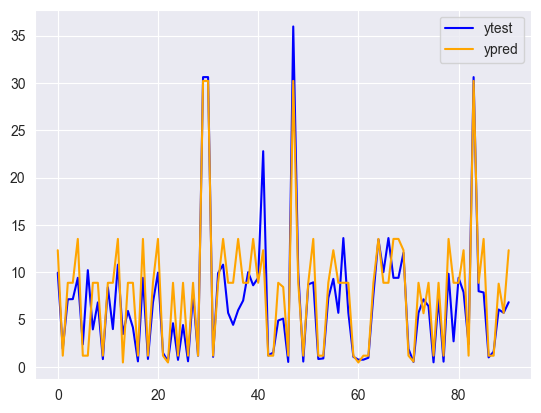

In [969]:
ypred = regression.predict(xtest)

print("R2 Score:", r2_score(ytest, ypred))

plt.plot(ytest, color="Blue", label="ytest", scalex='log')
plt.plot(ypred, color="orange", label="ypred")
plt.legend()
plt.show()

In [971]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(
    x=xtest.reshape(-1),
    y=ypred.reshape(-1),
)

plt.show()

ValueError: All arrays must be of the same length